# Tarea 2

Un canal televisivo ha observado desde las sombras cómo el Animé ha aumentado su popularidad de manera exponencial durante el último tiempo, por lo que se dispone a realizar su próxima apuesta por la animación japonesa y busca elegir qué serie comenzar a emitir. Para ello esta auspiciando el famoso festival “OtakuFest” lugar al que asisten tanto fans de la cultura japonesa, como los denominados Expertos, personas capaces de pasar más de 24 horas seguidas frente a una pantalla a disfrutar de una serie acompañados de su infaltable dosis de maruchan. Los Expertos han estado observando 4 tipos distintos de anime durante el último tiempo: 1.Hunter x Hunter, 2.Dragon Ball, 3.Naruto y 4.My Hero Academia. En el final del evento, los expertos votaron para escoger al animé de su preferencia dentro de las elecciones para decidir el ganador , el cual será finalmente transmitido en el canal televisivo.

Los resultados de la votación están incluidos en la base de datos “Anime.csv”, la cual posee una estructura de panel, en la cual cada fila representa un capítulo de la serie correspondiente, con sus respectivas características. La variable “Elección” toma el valor 1 si es que el Experto votó por dicho capítulo y 0 si no. El experto debe realizar su votación comparando el n-ésimo capítulo de cada serie y elegir de entre los cuatro cuál es el que más le gustó. Por ejemplo, luego de ver el primer capítulo de cada uno de los 4 anime, el experto elige un sólo ganador de los 4. Para no sobre-cargar cognitivamente a los Expertos, la evaluación selimitó a la evaluación de los primeros 12 capitulos de cada serie.

El equipo de programación piensa que esta información puede ser muy relevante para guiar las decisiones de programación. En estas decisión es importante considerar no solo cuál es la serie que tiene mayor rating sino que también el público al que les resulta más atractivo y si hubieran dinámicas en la evaluación en el tiempo. Quizás hay algunas series que, aunque en el global pueden ser bien evaluadas, podrían una partida lenta con baja preferencia en los primeros capítulos. Aunque hay un amplio historial de series existosas que han partido con bajo rating, es útil indentificar estas dinámicas para que, en caso de emitirse, el lanzamiento sea apoyado con estrategias promocionales que consoliden la propuesta de valor.



### Preguntas

1. (0 puntos) Explore los datos para poder entender qué variables podrían ser más influyentes en el hecho de que un experto elija un anime.

2. (2,0 puntos) Defina un modelo Logit y Mixed Logit multinomiales para estudiar las razones que llevan a un experto a elegir animes. Interprete los coeficientes y calcule la probabilidad de que una mujer de 25 años elija el anime naruto para el modelo logit multinomial.

3. (1,0 puntos) Construya un modelo Probit que capture los elementos de elección principales y comente sobre cómo se interpretan sus coeficientes.

4. (2,0 puntos) Utilizando lo aprendido de los modelos anteriores, construya dos modelos de machine and learning diferentes y compárelos con los modelos logits y probits estimados anteriormente, para ello calcule la matriz de confusión de cada modelo respecto a su predicción y utilice métricas derivadas a partir de esta para la comparación de los modelos.

5. (1,0 puntos) Resuma sus aprendizajes principales en un máximo de 4 tablas o figuras. Redacte de manera concisa sus resultados tal como los reportaría al departamento comercial interesado en informarse de la preferencia de los expertos. Agregue cualquier conclusión o idea que le parezca relevante de comunicar para que los representantes del canal de televisión tomen la mejor estrategia de programación televisiva.

---

Escribe acá todos los comandos que necesitas ejecutar antes de abordar las preguntas de la tarea (carga de librerías, lectura de datos, limpieza de la data, transformación de variables y todo lo que necesites)

#### Preparación Tarea

In [1]:
import pandas as pd 
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Librerías de ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# confusion Matrix
from sklearn.metrics import confusion_matrix

# Dataset
df = pd.read_csv('./Dataset/Anime.csv', index_col=0)
df.head(10)

# X e y
X = df.drop('Eleccion', axis=1) # revisar si tiene sentido incluir columna Expertos
y = df['Eleccion']

# Separamos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123) # 33% test
X_train.head()

,Expertos,Capitulos,Animes,Edad,Mujer,CantCaps,Scoremyanimelist,NEscenasCombate,NescenasEmocionantes,CalidadAnimacion,DuracionCapituloMin,RatingTV
306.1.1,306,1,1,29,1,575,8.15,1,6,7,37,5
203.5.4,203,5,4,37,1,113,8.04,12,2,7,55,16
437.2.1,437,2,1,46,1,575,8.15,8,0,2,50,30
918.2.1,918,2,1,41,0,575,8.15,8,0,2,50,30
546.6.1,546,6,1,42,0,575,8.15,3,4,4,34,22


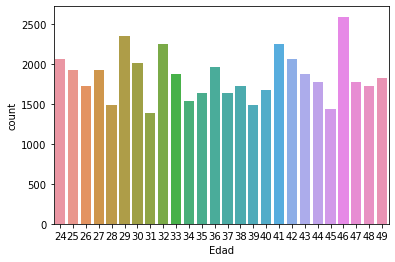

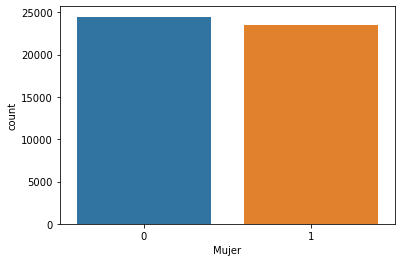

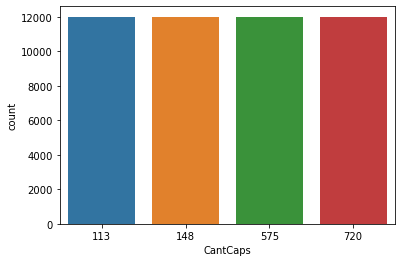

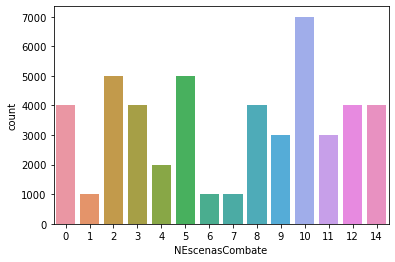

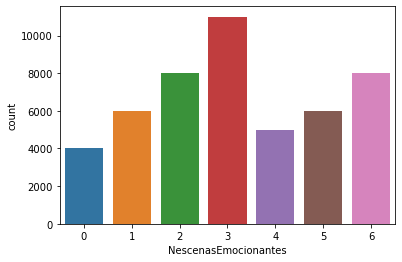

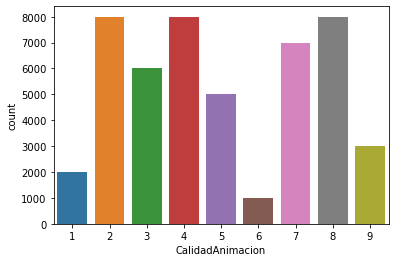

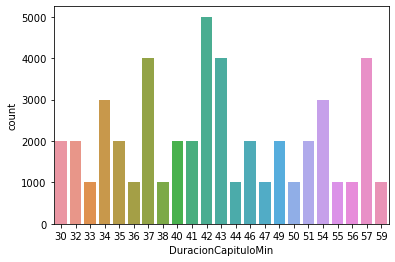

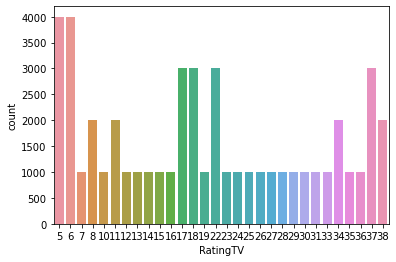

C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Eleccion', ylabel='count'>

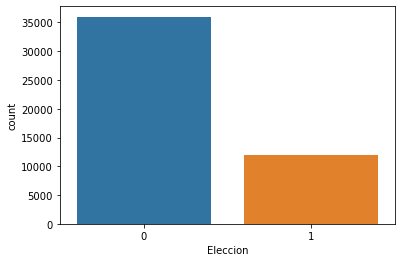

In [23]:
import seaborn as sns
for c in ["Edad","Mujer","CantCaps","NEscenasCombate","NescenasEmocionantes","CalidadAnimacion","DuracionCapituloMin","RatingTV"]:
    sns.countplot(x=c,data=X)
    plt.show()
#.drop(["Expertos","Capitulos","Animes"],axis=1).hist(figsize=(14,14),bins=100)
sns.countplot(y)

## Logit


In [19]:
# Reg Logística
logit = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = logit.predict(X_test)
print("-"*50)
print("Logistic Regression")
print("-"*50)
print("accuracy".ljust(30)+f"{accuracy_score(y_test,y_pred)}")
print("f1 score".ljust(30)+f"{f1_score(y_test,y_pred)}")

--------------------------------------------------
Logistic Regression
--------------------------------------------------
accuracy                      0.8291035353535353
f1 score                      0.592871108437359


In [6]:
# Coeficientes
coefs = np.round(logit.coef_[0],3)
print("-"*50)
print("Coeficientes")
print("-"*50)
for i in range(X.shape[1]):
    print(f"{X.columns[i]}:".ljust(30) + f"{coefs[i]}")

--------------------------------------------------
Coeficientes
--------------------------------------------------
Edad:                         -0.005
Mujer:                        0.001
CantCaps:                     0.002
Scoremyanimelist:             -0.988
NEscenasCombate:              0.044
NescenasEmocionantes:         0.423
CalidadAnimacion:             0.17
DuracionCapituloMin:          0.004
RatingTV:                     0.161


## Probemos algunos modelos de Machine Learning (Parte 4)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score # cambiar por funciones directas de matriz confusión
# para la confusion matrix podemos reciclar lo del lab de Datos (?)

# modelos a probar
# buscar cuáles sí vimos en clase
models = [KNeighborsClassifier(),LinearDiscriminantAnalysis(),DecisionTreeClassifier()]
model_names = ["KNN","LDA","DTC"]

for i in range(len(models)):
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)
    print("-"*50)
    print(model_names[i])
    print("-"*50)
    print("accuracy".ljust(30)+f"{accuracy_score(y_test,y_pred)}")
    print("f1 score".ljust(30)+f"{f1_score(y_test,y_pred)}")

--------------------------------------------------
KNN
--------------------------------------------------
accuracy                      0.9974116161616161
f1 score                      0.994835621614813
--------------------------------------------------
LDA
--------------------------------------------------
accuracy                      0.8301136363636363
f1 score                      0.6308135546714226
--------------------------------------------------
DTC
--------------------------------------------------
accuracy                      0.9974116161616161
f1 score                      0.994835621614813
